# <b>ML 6주차 세션 과제<b>

총 11문제입니다. <br/>
파이팅!

# **[6-1] 군집 알고리즘**

## 과일 사진 데이터 준비하기

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-07-16 14:21:20--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-07-16 14:21:20--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-07-16 14:21:21--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... con

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fruits = np.load('fruits_300.npy')

In [ ]:
print(fruits.shape)

(300, 100, 100)


In [ ]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


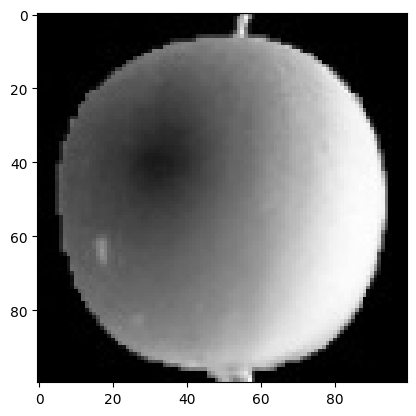

In [ ]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

## 문제1) 이미지의 배경을 검게 표현하는 위의 코드를 완성하시오

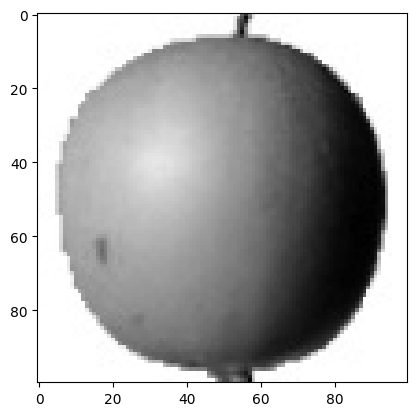

In [ ]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

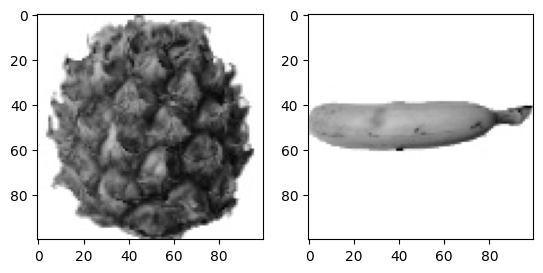

In [ ]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

## 문제2) 두 그래프가 1개의 열과 2개의 행으로 표현되도록 위의 코드를 완성하시오.


## 픽셀 값 분석하기

In [ ]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

## 문제3) 슬라이싱 연산자를 이용하여 fruits 배열에서 순서대로 100개씩 선택하고, 1차원 배열로 만드는, 위의 코드를 완성하시오.

In [ ]:
print(apple.shape)

(100, 10000)


In [ ]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


## 문제4) 위의 코드에서 axis 인수가 하는 역할에 대해 서술하시오. <br/>
정답)  열 방향으로 계산을 하게 한다. axis = 0 은 행




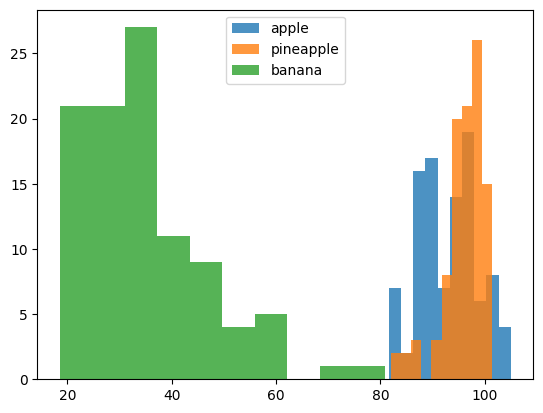

In [ ]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

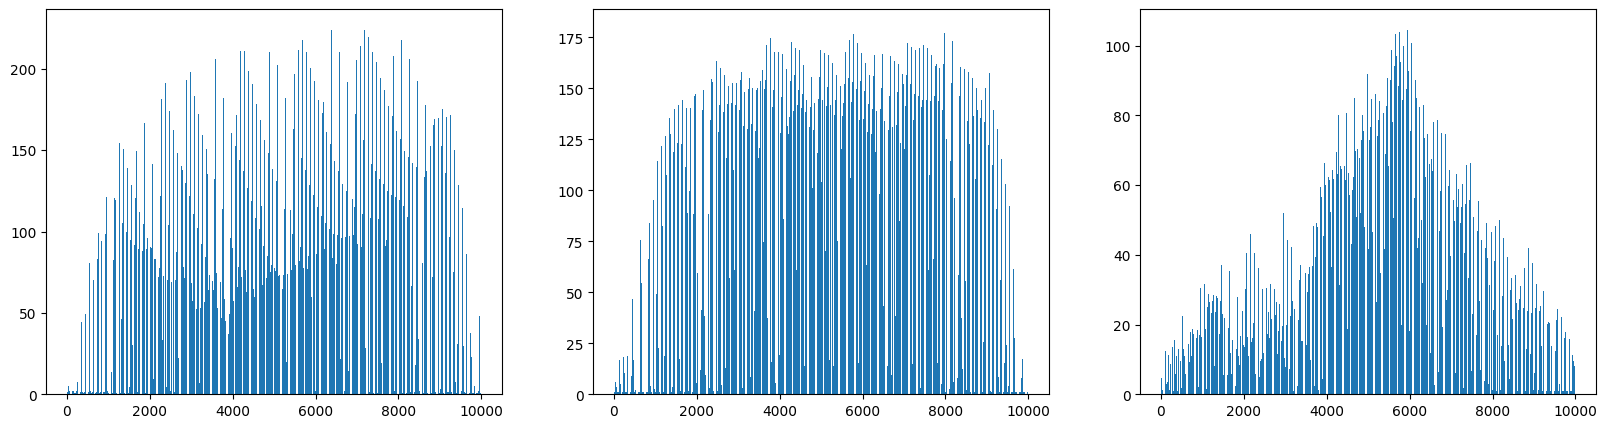

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

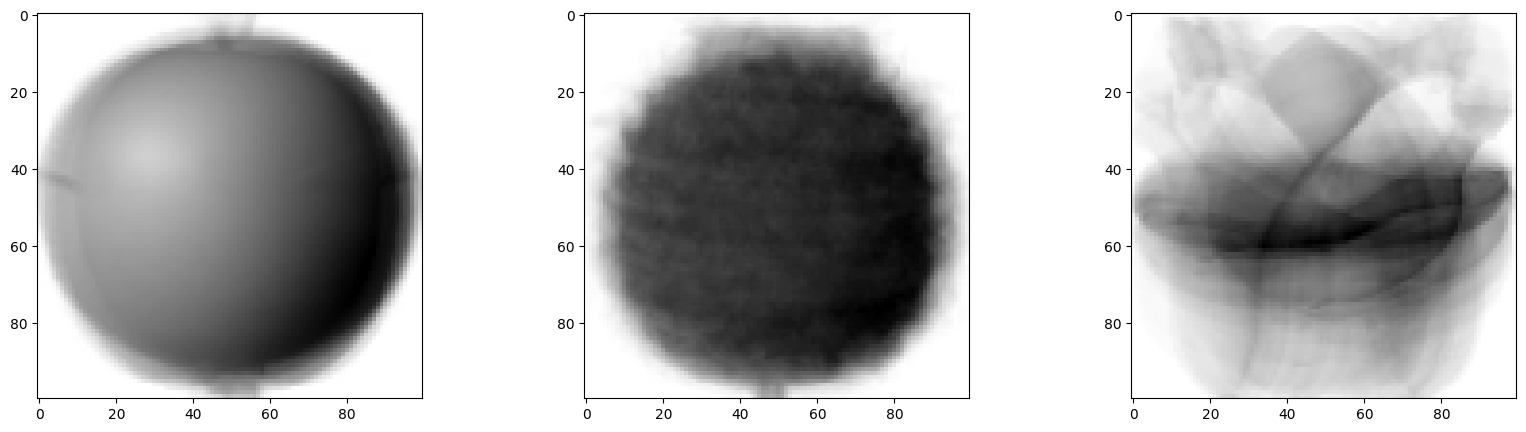

In [ ]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

## 평균값과 가까운 사진 고르기

In [ ]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


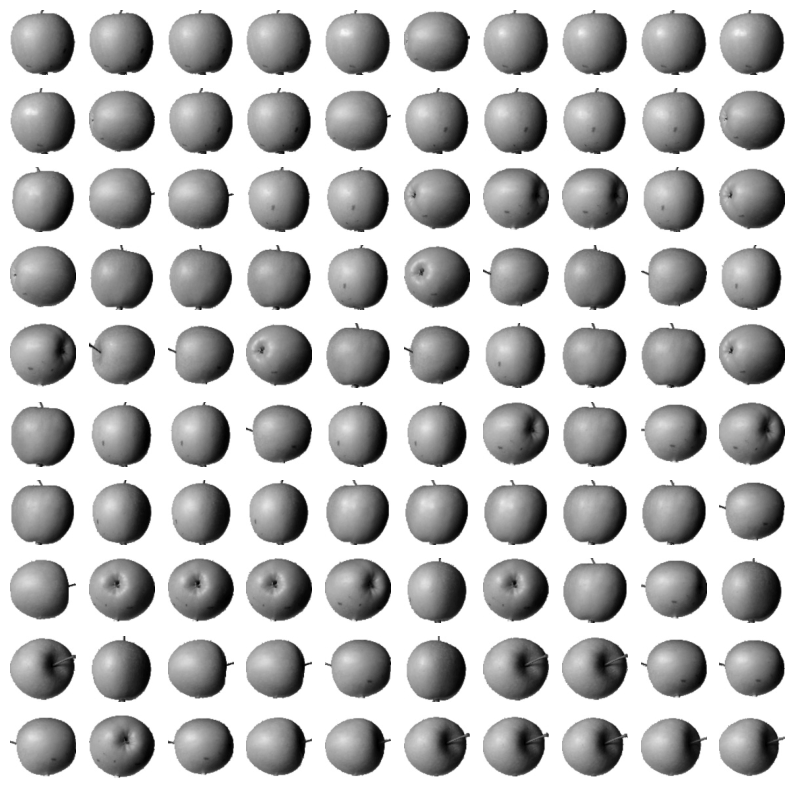

In [ ]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

## 문제5) 위의 코드를 보고 아래의 질문에 답변하시오.
(1) argsort(abs_mean)의 기능을 작성하시오 : 작은거에서 큰 거 순으로 <br/>
(2) figsize의 기본값을 작성하시오 : 저 사과가 그려진 배경 크기 지정<br/>
(3) axis('off')의 기능을 작성하시오 : 좌표축을 그리지 x

# **[6-2] k-평균**

## KMeans 클래스

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

## 문제6) 위의 코드를 보고 아래의 질문에 답변하시오 <br/>
(1) k-평균 알고리즘에 사용된 데이터가 몇 차원 데이터인지 작성하시오 : 10000 <br/>
(2) 클러스터의 개수가 몇 개로 지정되었는지 작성하시오 : 3<br/>
(3) 타깃 데이터의 유무를 선택하시오 [O/X] : x

In [ ]:
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

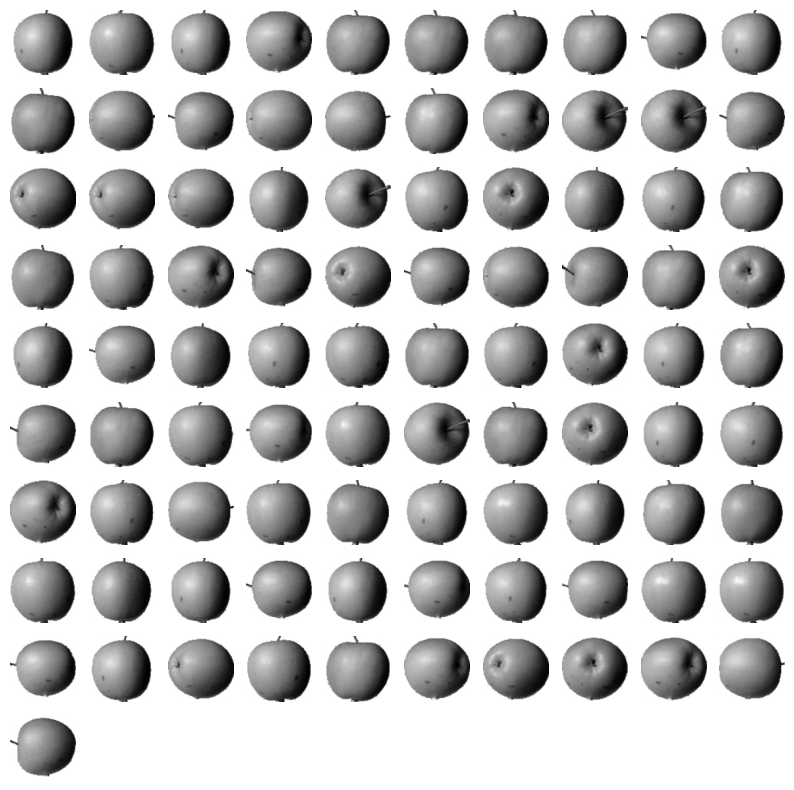

In [ ]:
draw_fruits(fruits[km.labels_==0])

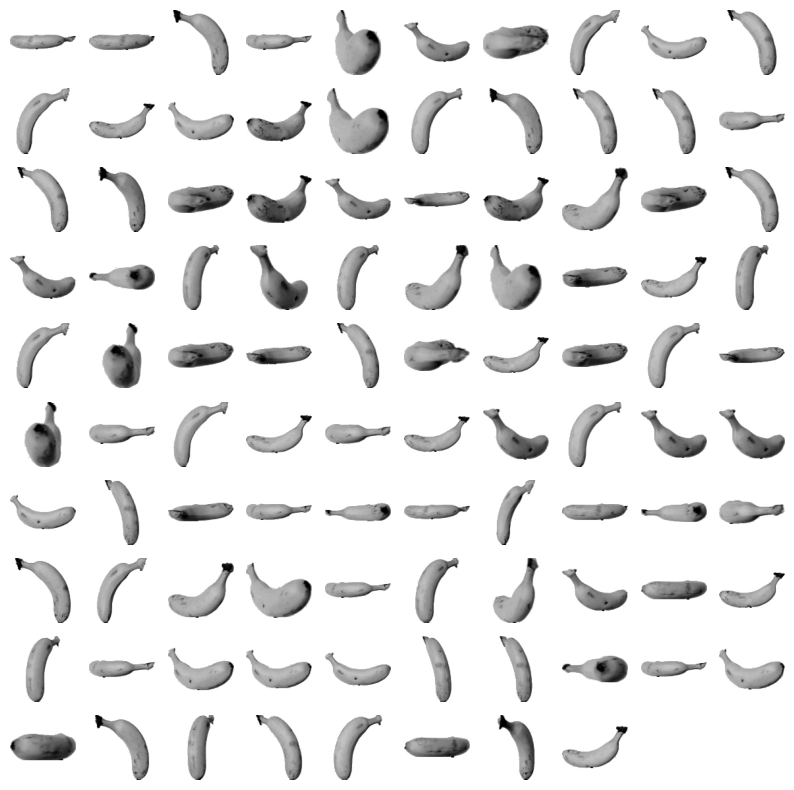

In [ ]:
draw_fruits(fruits[km.labels_==1])

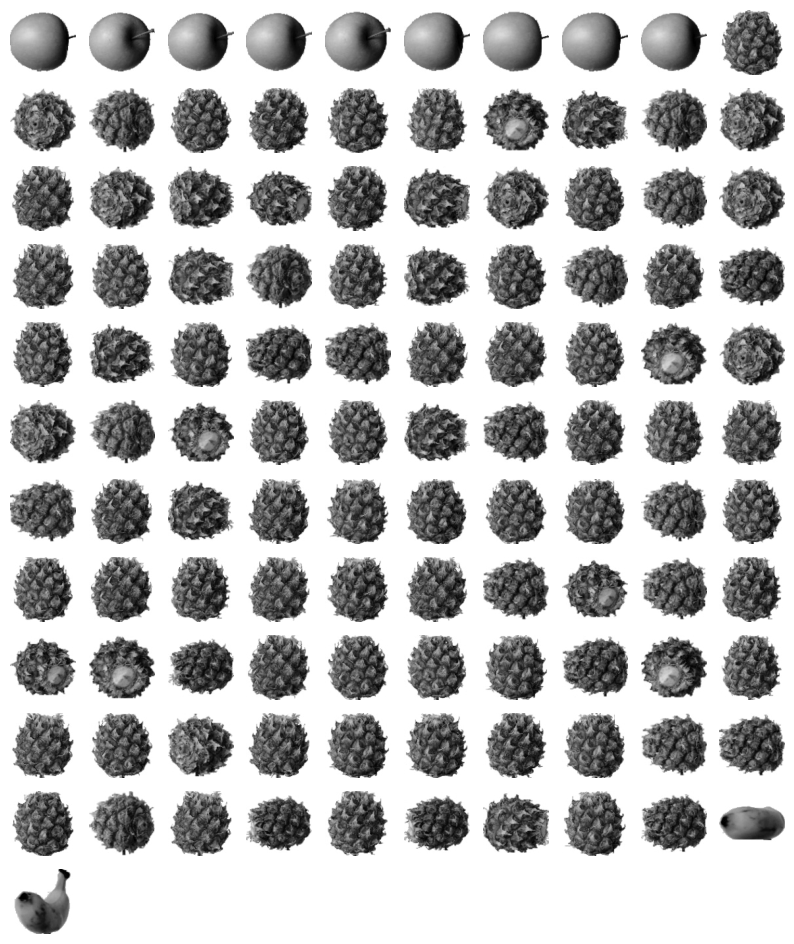

In [ ]:
draw_fruits(fruits[km.labels_==2])

## 클러스터 중심

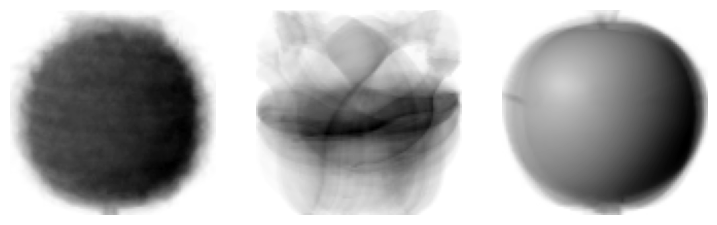

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [ ]:
print(km.transform(fruits_2d[100:101])) # 훈련 데이터 샘플에서 클러스터 중심까지 거리

[[3393.8136117  8837.37750892 5267.70439881]]


## 문제7) 위 샘플은 어느 레이블에 속할 지 예측해보고 그 이유를 적으시오.<br/>
(1) 레이블 : 0 <br/>
(2) 이유 : 중심과의 거리가 가장 작게 나와서 <br/>

In [ ]:
print(km.predict(fruits_2d[100:101])) # 예측값 확인

[0]


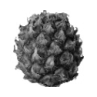

In [ ]:
draw_fruits(fruits[100:101])

In [ ]:
print(km.n_iter_) # 클러스터 중심을 옮기면서 반복한 횟수

4


## 최적의 k 찾기

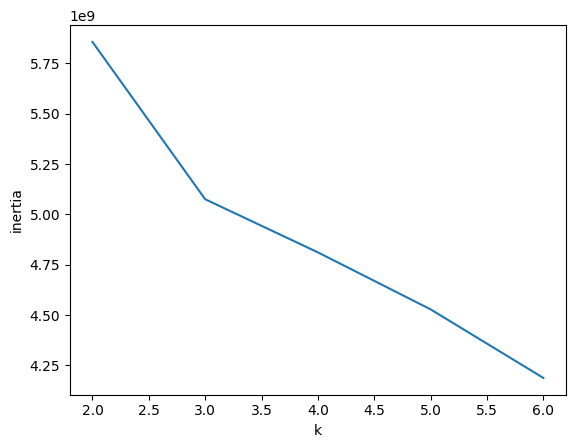

In [ ]:
inertia = [] # 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지 나타내는 지표
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

## 문제8) 위 코드에서 빈 코드를 완성하고 엘보우 방법을 사용하여 최적의 k를 말하시오.<br/>
정답)  3

# **[6-3] 주성분 분석**

## PCA 클래스

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 주성분 개수 지정
pca.fit(fruits_2d)

print(pca.components_.shape) # 50개의 주성분, 1000개의 원본 데이터 특성 개수

(50, 10000)


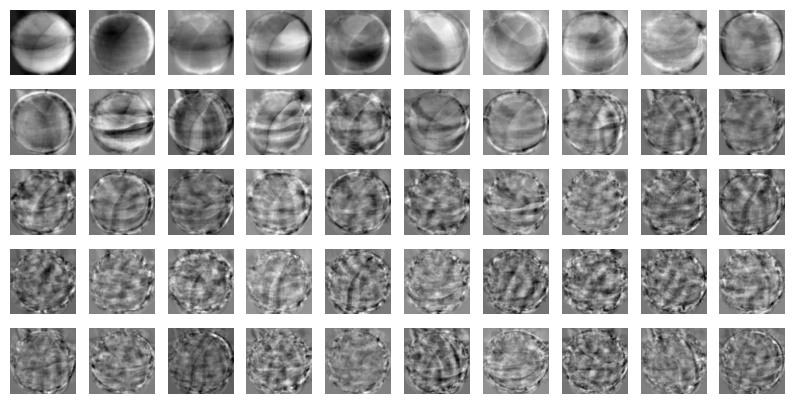

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100)) # 주성분 그림으로 그려보기

In [ ]:
print(fruits_2d.shape) # 원본 데이터

(300, 10000)


In [ ]:
fruits_pca =  pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca) # 차원 축소한 데이터 전달해 복원
print(fruits_inverse.shape)

(300, 10000)


## 문제9) 위 코드에서 주성분을 통해 원본 데이터의 차원을 줄이는 코드와, 이를 통해 원본 데이터를 재구성하는 코드를 완성하시오. <br/>

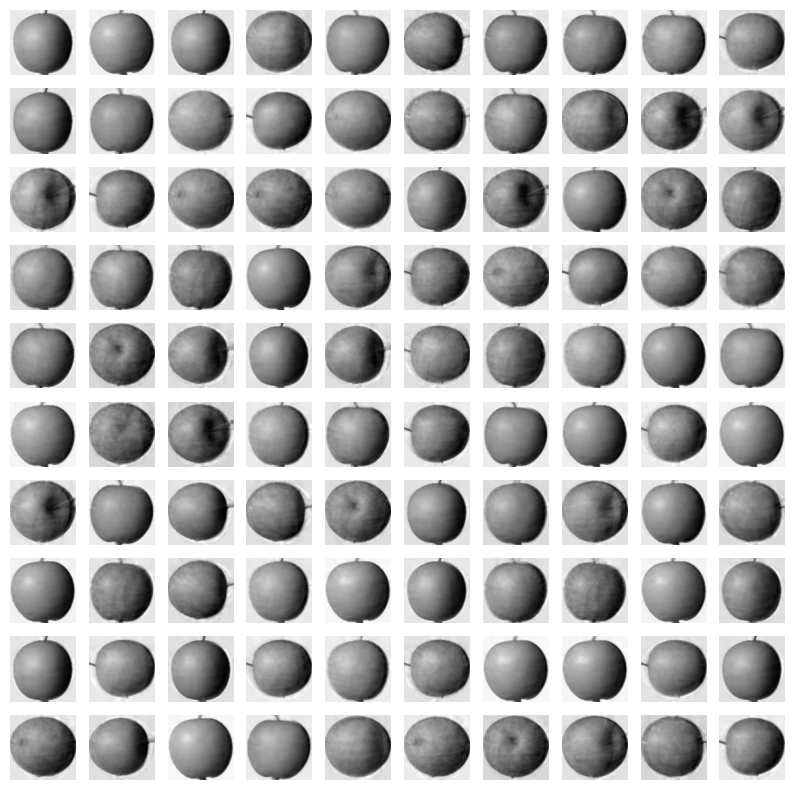

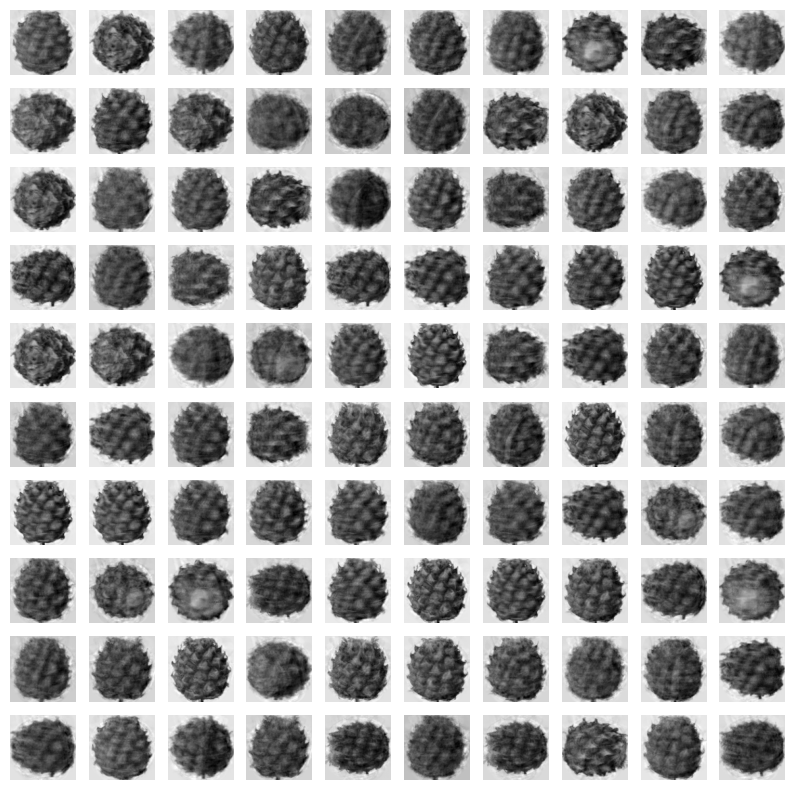

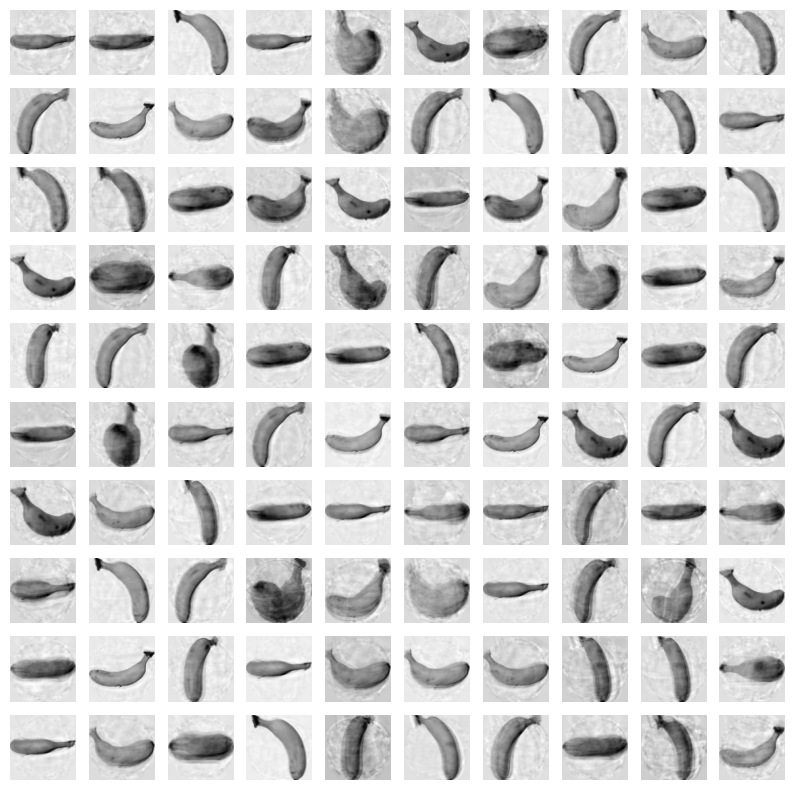

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100) # 100 * 100 크기로 변환
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100]) # 100개씩 나눠서 출력
    print("\n")

##설명된 분산

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215651897863715


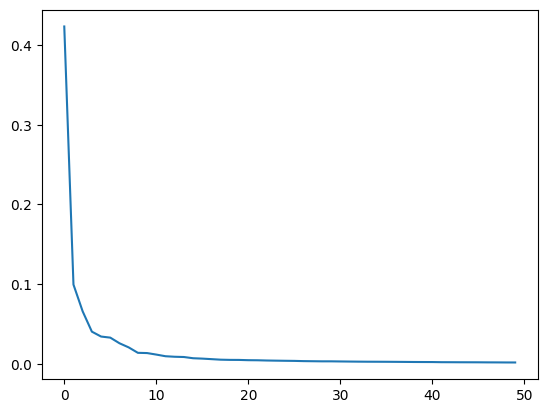

In [ ]:
plt.plot(pca.explained_variance_ratio_) # 설명된 분산의 비율 그래프로 그려보기

## 다른 알고리즘과 함께 사용하기

In [ ]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
lr = LogisticRegression()

target = np.array([0] * 100 + [1] * 100 + [2] * 100) # 타깃 데이터

from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target) # 원본 데이터로 교차 검증 수행
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 각 교차 검증 폴드의 훈련 시간

0.9966666666666667
1.819899892807007


In [ ]:
scores = cross_validate(lr, fruits_pca, target) # 차원 축소 데이터로 교차 검증
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 훈련 시간 감소

1.0
0.032833099365234375


In [ ]:
pca = PCA(n_components=0.5) # 설명된 분산의 50%에 달하는 주성분을 찾도록
pca.fit(fruits_2d)
print(pca.n_components_)

2


## 문제10) PCA 클래스에서 설명된 분산의 비율을 지정해 주성분 분석을 수행하는 위의 코드를 완성하고 설명된 분산의 개념을 서술하시오. <br/>
개념) 설명된 분산 : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [ ]:
fruits_pca = pca.transform(fruits_2d) # 원본 데이터 변환
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03713240623474121


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
from sklearn.cluster import KMeans
# 차원 축소된 데이터로 k-means 알고리즘 수행해 클러스터 찾기

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


## 문제11) 위 코드의 결과에서 각 클러스터가 몇개의 샘플을 포함하고 있는지 적고, 원본 데이터를 사용했을 때의 결과와 비교하시오. <br/>
(1) 110, 99, 91 순서대로 클러스터 0,1,2<br/>
(2) 비슷하다/다르다 : 비슷하다 <br/>

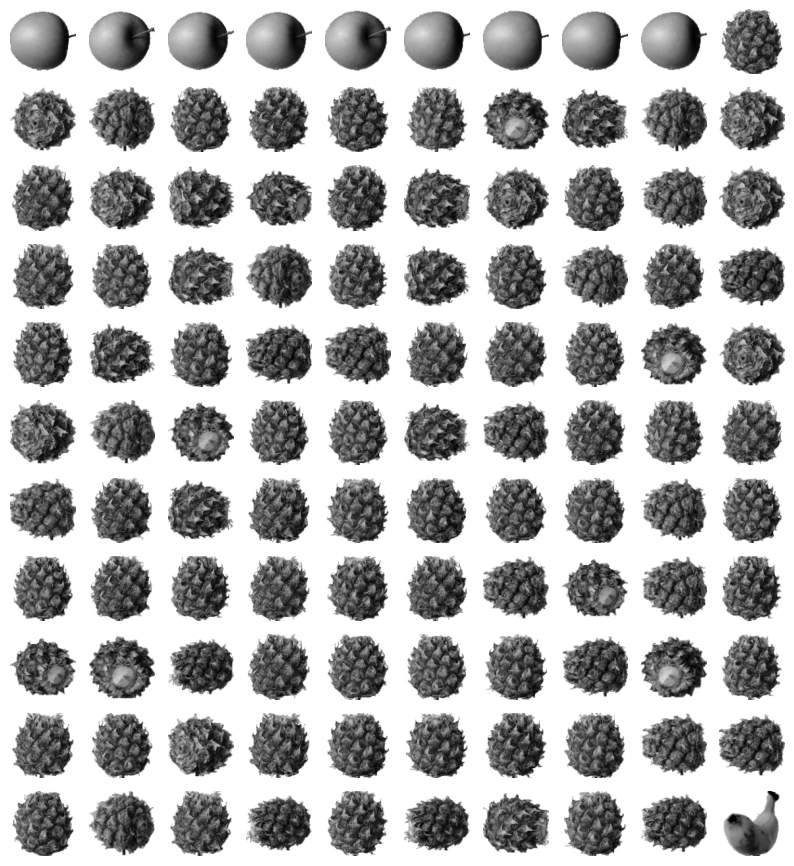

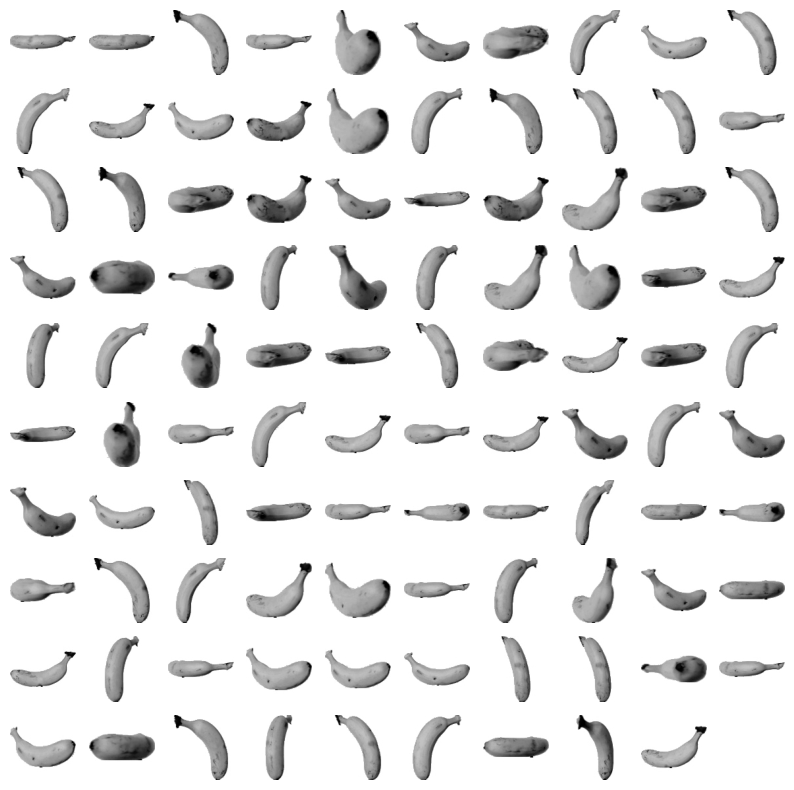

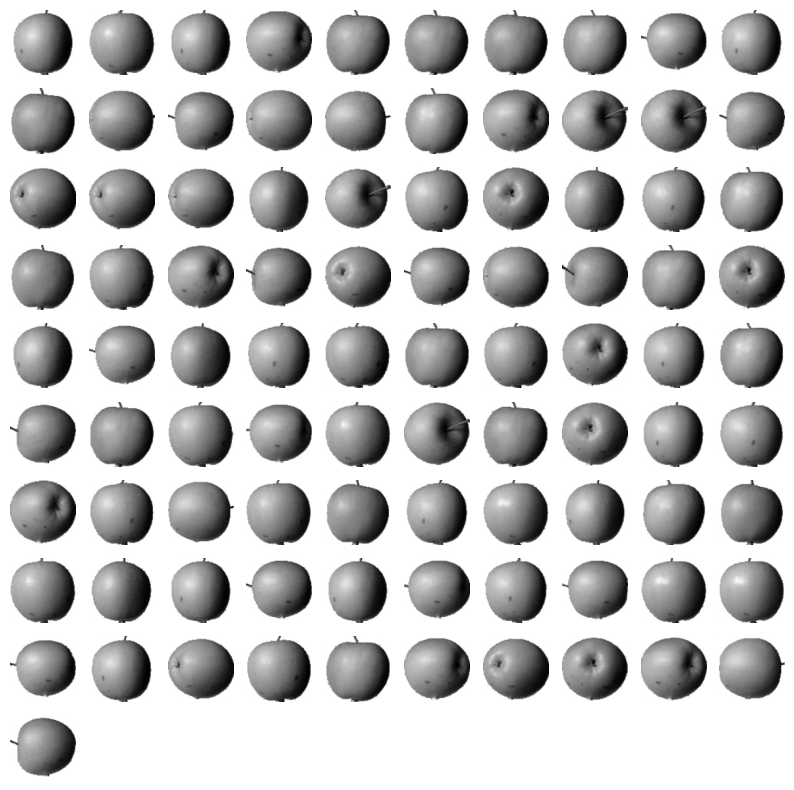

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

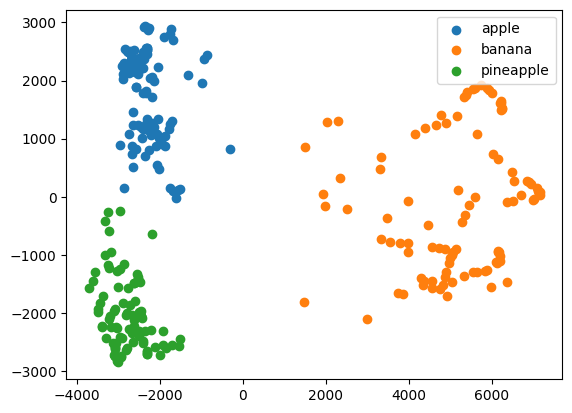

In [ ]:
for label in range(0, 3): # 산점도 그리기
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()